In [1]:
# Сравниваем начальный и отфильтрованный датасет чтобы показать что из-за фильтрации не влзникло жестких перекосов

# Сравниаем пропорции топиков до и после

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
def get_count(df):
    
    def round_up(val):
        if float(val) > 0.5:
            return 1
        return 0

    df_count = pd.DataFrame()
    for c in topics:
        if c != 'text':
            df_count[c] = df[c].apply(round_up)
            
    counts = []
    names = []
    for col in df_count.columns:
        cnt = sum(df_count[col])
        counts.append(cnt)
        names.append(col)
        
    df_count_fin = pd.DataFrame({'class':names, 'count':counts})
    df_count_fin_sorted = df_count_fin.sort_values('count', ascending = False)
    return df_count_fin_sorted, len(df)

In [5]:
def plot_df(df, df_len):
    dct = {}
    for  i,d in df.iterrows():
        t,c = d
        dct[t] = c
    same_order_values = [dct[t] for t in topics]
    
        # Generate a normal distribution, center at x=0 and y=5
    x_positions = np.arange(len(topics) )
    y = same_order_values

    # We can set the number of bins with the `bins` kwarg
    plt.bar(x_positions,y, align='center', alpha=0.5)
    plt.xticks(x_positions, topics)
    plt.xticks(rotation = 85, fontsize=14)
    plt.ylabel('count per topic', fontsize=14)
    plt.title("Total сount of samples = {}".format(df_len), fontsize=14)

    plt.show()

In [7]:
topics = ['offline_crime', 'online_crime', 'drugs', 'gambling', 'pornography',
       'prostitution', 'slavery', 'suicide', 'terrorism', 'weapons',
       'body_shaming', 'health_shaming', 'politics', 'racism', 'religion',
       'sexual_minorities', 'sexism', 'social_injustice']

topics = sorted(topics, reverse=True)

In [5]:
topics

['weapons',
 'terrorism',
 'suicide',
 'social_injustice',
 'slavery',
 'sexual_minorities',
 'sexism',
 'religion',
 'racism',
 'prostitution',
 'pornography',
 'politics',
 'online_crime',
 'offline_crime',
 'health_shaming',
 'gambling',
 'drugs',
 'body_shaming']

In [2]:
df_step2 = pd.read_csv("../appropriateness/Appropriateness.csv")

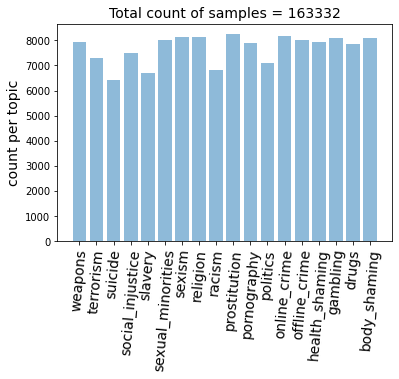

In [8]:
dfr, df_len = get_count(df_step2)
plot_df(dfr, df_len)

In [10]:
df_step3 = pd.read_csv("../check_agreement//Inappropriate_09_top_vs_one_with_multi.csv")

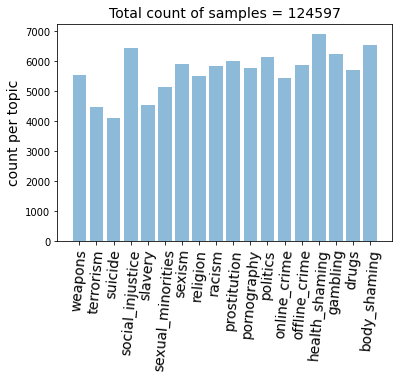

In [13]:
dfr, df_len = get_count(df_step3)
plot_df(dfr, df_len)

In [16]:
dfr.sort_values('class', ascending = True)

,class,count
17,body_shaming,6539
16,drugs,5717
15,gambling,6250
14,health_shaming,6903
13,offline_crime,5858
12,online_crime,5455
11,politics,6150
10,pornography,5775
9,prostitution,5990
8,racism,5849


In [10]:
dfr2, df_len2 = get_count(df_step2)
dfr3, df_len3 = get_count(df_step3)
dfr3.rename(columns = {'count':'count3'}, inplace = True)

In [11]:
df_compare = pd.concat([dfr2,dfr3['count3']],axis = 1)

In [12]:
df_compare

,class,count,count3
0,weapons,7951,5546
1,terrorism,7301,4470
2,suicide,6425,4117
3,social_injustice,7494,6446
4,slavery,6700,4538
5,sexual_minorities,7994,5130
6,sexism,8137,5899
7,religion,8142,5520
8,racism,6816,5849
9,prostitution,8249,5990


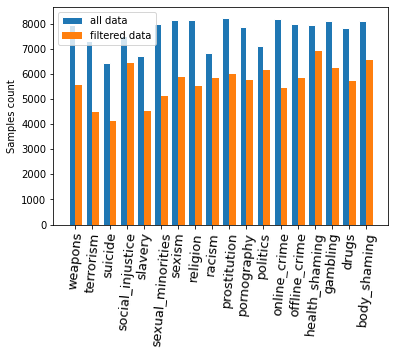

In [13]:
# plt.figure(figsize=(16,14))

fig, ax = plt.subplots()
topic_width = 0.4
x_topics = np.arange(len(df_compare))
# x_topics = np.array([2*i for i in range(len(df_kw_CNT))])


# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

ax.bar(x_topics - topic_width/2, df_compare['count'].tolist(), topic_width, label='all data', capsize=2,edgecolor = 'white')
ax.bar(x_topics + topic_width/2, df_compare['count3'].tolist(), topic_width, label='filtered data', capsize=2,)
# ax.bar(x_topics + topic_width*1.2 , df_toloka_CNT['count'].tolist(), topic_width, label='crowdsource', capsize=2,)

# rects2 = ax.bar(x_topics + topic_width/2, multi_dataset_count, topic_width, color='r', label = 'Sensitive dataset')

ax.set_xticks(x_topics)
ax.set_xticklabels(df_compare['class'].tolist())

plt.xticks(rotation = 85, fontsize=13)
ax.set_ylabel('Samples count')
# ax.set_title('Scores by group and gender')
ax.legend(loc='best')

# ax.legend(bbox_to_anchor=(0.15, 1.1), loc='upper left',fontsize=12)

# 

plt.show()
# plt.savefig("multilabel_source_plot.pdf",format='pdf', bbox_inches='tight')

# Get thorough plot

In [14]:
df_step2 = pd.read_csv("../appropriateness/Appropriateness.csv")
df_step3 = pd.read_csv("../check_agreement//Inappropriate_09_top_vs_one_with_multi.csv")
df_multi = pd.read_csv("../check_agreement_topics/sensitive_topics_vers3.csv")

In [15]:
def get_ap_inapp(df):
    inapp = []
    app = []
    for t in topics:
        df_curr_topic = df[df[t]>0.5]
        app.append(len(df_curr_topic[df_curr_topic['inappropriate']<0.5]))
        inapp.append(len(df_curr_topic[df_curr_topic['inappropriate']>=0.5]))
    return np.array(app), np.array(inapp)

In [16]:
step2_app, step2_inapp = get_ap_inapp(df_step2)

In [17]:
step2_app

array([5558, 3444, 3548, 5405, 4174, 4593, 5746, 5025, 3553, 5968, 3771,
       4373, 5295, 5044, 6907, 6513, 4235, 6385])

In [18]:
step2_inapp

array([2393, 3857, 2877, 2089, 2526, 3401, 2391, 3117, 3263, 2281, 4118,
       2732, 2879, 2959, 1038, 1583, 3600, 1718])

In [19]:
step3_app, step3_inapp = get_ap_inapp(df_step3)

In [20]:
topics_count_sens = []
for t in topics:
    topics_count_sens.append(len(df_multi[df_multi[t]>0.5]))
    
topics_count_sens = np.array(topics_count_sens)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
len(x_topics)

18

In [23]:
len(step2_app)

18

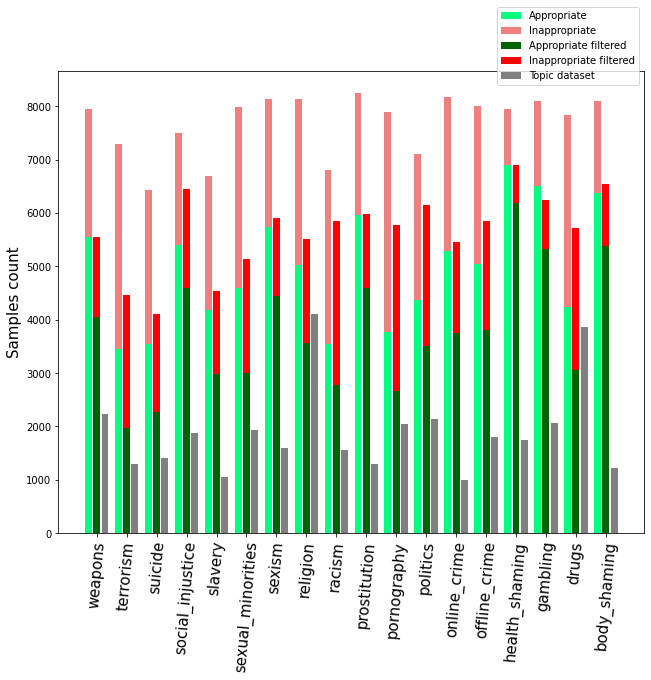

In [24]:

width = 0.3 
# x_topics = np.arange(len(topics))
x_topics = np.array([1.3*i for i in range(len(topics))])

fig, ax = plt.subplots()

plt.bar(x_topics-width*1.2, step2_app, width, color='springgreen', label = 'Appropriate')
plt.bar(x_topics-width*1.2, step2_inapp, width,  bottom=step2_app, color='lightcoral', label = 'Inappropriate' )

plt.bar(x_topics, step3_app, width, color='darkgreen', label = 'Appropriate filtered' )
plt.bar(x_topics, step3_inapp, width,  bottom=step3_app, color = 'red', label = 'Inappropriate filtered')

plt.bar(x_topics+width*1.2, topics_count_sens, width, color = 'gray', label = 'Topic dataset')

# plt.bar(topics, toloka, width,  bottom=self+kw)

ax.set_xticks(x_topics)
ax.set_xticklabels(topics)

plt.xticks(rotation = 85, fontsize=15)
plt.ylabel('Samples count', fontsize=15)

fig.set_size_inches(10.5, 8.5)

ax.legend(loc='best', bbox_to_anchor=(0.5, 0.65, 0.5, 0.5))

plt.show()
# plt.savefig("al_datasets_counts.pdf",format='pdf', bbox_inches='tight')

In [108]:
np.mean([app/(app+inapp )for app,inapp in zip(step2_app,step2_inapp)])

0.6435387573083696

In [109]:
np.mean([app/(app+inapp )for app,inapp in zip(step3_app,step3_inapp)])

0.6551576436377782

In [110]:
total_step2 = [app + inapp for app,inapp in zip(step2_app,step2_inapp)]
total_step3 = [app + inapp for app,inapp in zip(step3_app,step3_inapp)]

In [114]:
reduce_pcnt = [(t2-t3)/t2 for t2,t3 in zip(total_step2,total_step3)]

In [116]:
np.mean(reduce_pcnt)

0.26158906863931564

In [119]:
np.std(reduce_pcnt)

0.08081685578998661

# Check other filtered vs original properties

In [26]:
df_step2 = pd.read_csv("../appropriateness/Appropriateness.csv")
df_step3 = pd.read_csv("../check_agreement//Inappropriate_09_top_vs_one_with_multi.csv")

In [30]:
df_step2['wc'] = df_step2['text'].apply(lambda x : len(x.split()))
df_step3['wc'] = df_step3['text'].apply(lambda x : len(x.split()))

<AxesSubplot:>

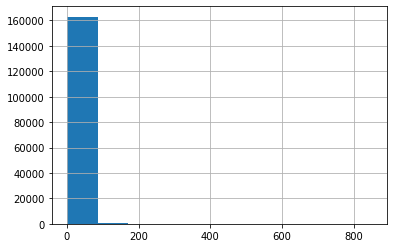

In [29]:
df_step2['wc'].hist()

In [32]:
max(df_step2['wc'])

850

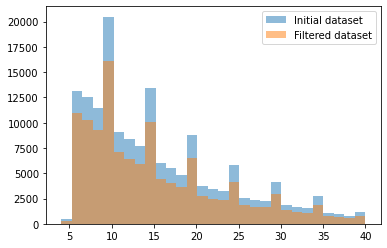

In [50]:
x = df_step2['wc'].tolist()
y = df_step3['wc'].tolist()

bins = numpy.linspace(4, 40, 30)

pyplot.hist(x, bins, alpha=0.5, label='Initial dataset')
pyplot.hist(y, bins, alpha=0.5, label='Filtered dataset')
pyplot.legend(loc='upper right')
pyplot.show()

In [51]:
!pip install textstat

You should consider upgrading via the 'C:\Users\N.Babakov\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [53]:
import textstat

In [58]:
textstat.set_lang('ru')

In [66]:
df_step2['fc'] = df_step2['text'].apply(lambda x : textstat.flesch_kincaid_grade((x)))
df_step3['fc'] = df_step3['text'].apply(lambda x : textstat.flesch_kincaid_grade((x)))

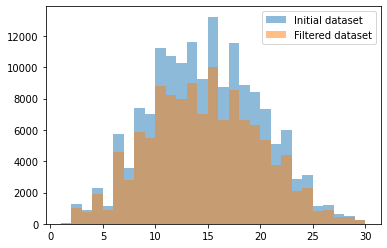

In [77]:
x = df_step2['fc'].tolist()
y = df_step3['fc'].tolist()

bins = numpy.linspace(1, 30, 30)

pyplot.hist(x, bins, alpha=0.5, label='Initial dataset')
pyplot.hist(y, bins, alpha=0.5, label='Filtered dataset')
pyplot.legend(loc='upper right')
pyplot.show()

In [80]:
python pretrain_launcher.py --device 0 --model cross_base_supervised_random > ./logs/current_train_base.txt &

IndexError: too many indices for array

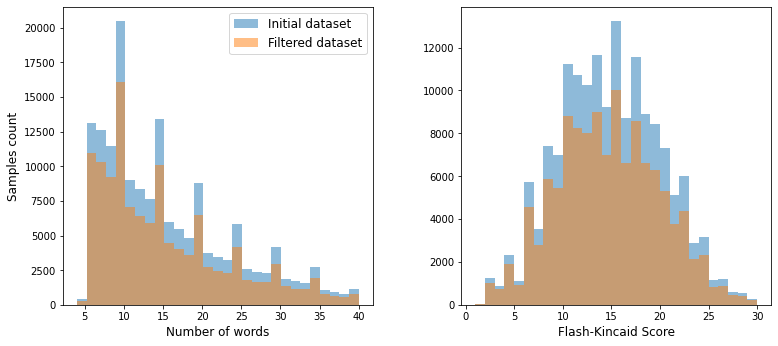

In [123]:
fig = plt.figure(figsize=(12,6))#

plt.subplot(1, 2, 1) # row 1, col 2 index 1
bins = numpy.linspace(4, 40, 30)
pyplot.hist(df_step2['wc'].tolist(), bins, alpha=0.5, label='Initial dataset')
pyplot.hist(df_step3['wc'].tolist(), bins, alpha=0.5, label='Filtered dataset')
pyplot.legend(loc='upper right', fontsize=12)
pyplot.xlabel("Number of words", fontsize=12)
pyplot.ylabel("Samples count", fontsize=12)

plt.subplot(1, 2, 2) 
bins = numpy.linspace(1, 30, 30)
pyplot.hist(df_step2['fc'].tolist(), bins, alpha=0.5, label='Initial dataset');
pyplot.hist(df_step3['fc'].tolist(), bins, alpha=0.5, label='Filtered dataset');
pyplot.xlabel("Flash-Kincaid Score", fontsize=12)

fig.tight_layout(pad=5.0)
plt.savefig("filtered_and_original_comparison.pdf",format='pdf', bbox_inches='tight')

In [67]:
df_step2['fc']

0         16.3
1         21.7
2         17.8
3         24.8
4         16.2
          ... 
163327    17.0
163328    18.5
163329    10.4
163330    22.9
163331    12.7
Name: fc, Length: 163332, dtype: float64

In [64]:
textstat.flesch_kincaid_grade(("привет как дела"))

5.6